<a href="https://colab.research.google.com/github/leprechaunmasha/cci/blob/main/learn_medical_image_analysis_in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Анализ медицинских изображений в Python

In [ ]:
!pip install pydicom

     |████████████████████████████████| 2.0 MB 5.4 MB/s 


In [ ]:
#Gdrive and colab

from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

#news = pd.read_excel('/gdrive/MyDrive/DataScientistWork/datasets/2020news.xlsx', header=0)
#news.info()

Mounted at /gdrive
/gdrive


In [ ]:
!pip install kaggle

# DICOM

Для работы с DICOM файлами мы будем использовать библиотеку pydicom.

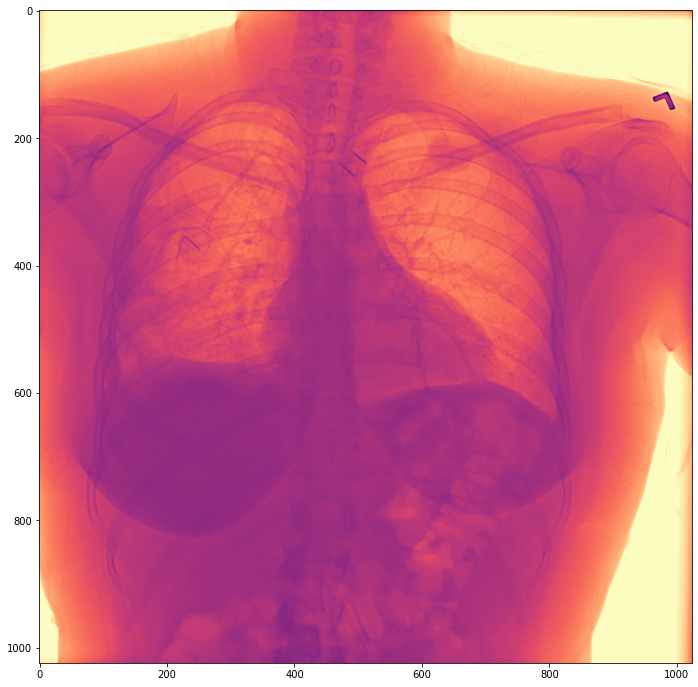

In [ ]:
# Импортируем все необходимые для работы библиотеки

import pydicom # библиотека для работы с DICOM файлами

from matplotlib import cm # цветовые схемы для визуализации
from matplotlib import pyplot as plt # библиотека для визуализации 

#example = 'stage_2_images/ID_01fe90211.dcm'
example = '/gdrive/MyDrive/MedicalData/Pneumothorax/stage_2_images/ID_00b115bfe.dcm'
imagedata = pydicom.dcmread(example)

plt.figure(figsize=(12, 12))
plt.imshow(imagedata.pixel_array, cmap=plt.cm.magma_r)
plt.show()

In [ ]:
# Извлечем ID пациента, возраст, пол, модальность, часть тела и рентгенологический вид изображения относительно ориентации объекта.

print("ID:", imagedata.PatientID)
print("Возраст:", imagedata.PatientAge)
print("Пол:", imagedata.PatientSex)
print("Модальность:", imagedata.Modality)
print("Часть тела:", imagedata.BodyPartExamined)
print("Рентгенологический вид изображения относительно ориентации объекта:", imagedata.ViewPosition)

ID: 
Возраст: 24
Пол: F
Модальность: CR
Часть тела: CHEST
Рентгенологический вид изображения относительно ориентации объекта: PA


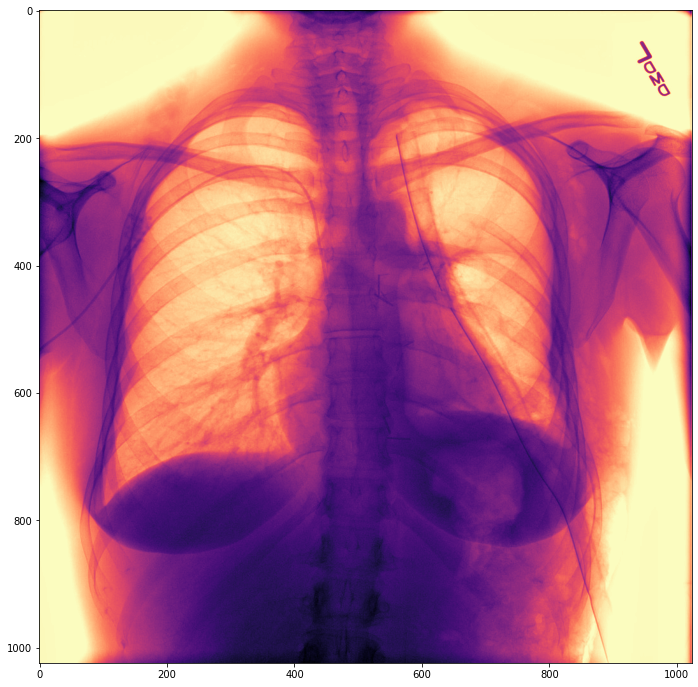

In [ ]:
#example = 'stage_2_images/ID_01fe90211.dcm'
#example = '/gdrive/MyDrive/MedicalData/Pneumothorax/stage_2_images/ID_00b115bfe.dcm'

example = '/gdrive/MyDrive/MedicalData/Pneumothorax/stage_2_images/ID_01fe90211.dcm'
imagedata = pydicom.dcmread(example)

plt.figure(figsize=(12, 12))
plt.imshow(imagedata.pixel_array, cmap=plt.cm.magma_r)
plt.show()

In [ ]:
# Извлечем ID пациента, возраст, пол, модальность, часть тела и рентгенологический вид изображения относительно ориентации объекта.

print("ID:", imagedata.PatientID)
print("Возраст:", imagedata.PatientAge)
print("Пол:", imagedata.PatientSex)
print("Модальность:", imagedata.Modality)
print("Часть тела:", imagedata.BodyPartExamined)
print("Рентгенологический вид изображения относительно ориентации объекта:", imagedata.ViewPosition)


ID: 
Возраст: 26
Пол: F
Модальность: CR
Часть тела: CHEST
Рентгенологический вид изображения относительно ориентации объекта: PA


Думаю с ID, возрастом и полом (F-Female, M-Male) всё понятно. Разберемся с модальностью. Основные типы (модальности) поддерживаемых стандартом DICOM медицинских изображений представлены ниже:

* CR — Компьютерная рентгенография (Computed Radiography);
* CT — Компьютерная томография (Computed Tomography);
* DX — Цифровая рентгенография (Digital Radiography);
* MG — Маммография (Mammography).
* И многие другие типы исследований.

Часть тела: CHEST - грудная клетка. С полным списком всех аббревиатур частей тела можно ознакомиться тут. Что касается вида изображения относительно ориентации объекта изображения, то для грудной клетки оно может принимать значения соответствующие прямой (передняя и задняя) и боковой (левая или правая) проекции. PA - передняя, AP - задняя.

In [ ]:
# Еще отдельно мы можем проверить есть ли в DICOM файле изображение и её размер.

if 'PixelData' in imagedata:
    rows = int(imagedata.Rows)
    cols = int(imagedata.Columns)
    print("Размер изображения : {rows:d} x {cols:d}, {size:d} байт".format(
        rows=rows, cols=cols, size=len(imagedata.PixelData)))

Размер изображения : 1024 x 1024, 116012 байт


## Обзор данных

In [ ]:
from glob import glob
import numpy as np
import pandas as pd
import seaborn as sns


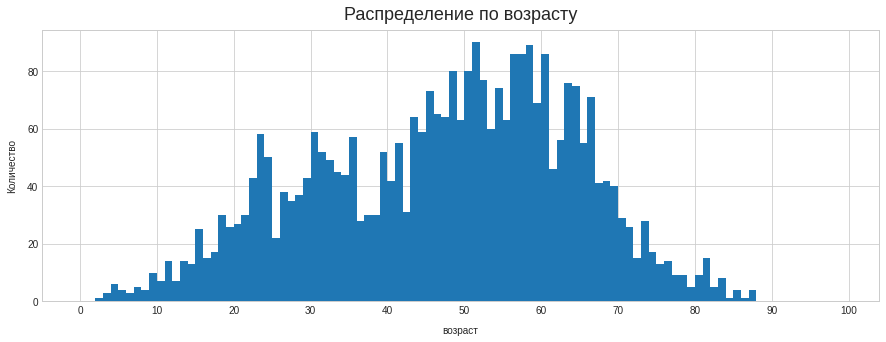

CPU times: user 6.57 s, sys: 1.37 s, total: 7.94 s
Wall time: 15.7 s


In [ ]:
%%time
datalist = sorted(glob("/gdrive/MyDrive/MedicalData/Pneumothorax/stage_2_images/*.dcm")) # создадим лист содержащий пути ко всем файлам

# Для удобства анализа создадим датафрейм с метаданными
patients = []

for t in datalist:
    data = pydicom.dcmread(t)
    patient = {}
    patient["UID"] = data.SOPInstanceUID
    patient["Age"] = data.PatientAge
    patient["Sex"] = data.PatientSex
    patient["Modality"] = data.Modality
    patient["BodyPart"] = data.BodyPartExamined
    patient["ViewPosition"] = data.ViewPosition
    patients.append(patient)

df_patients = pd.DataFrame(patients, columns=["UID", "Age", "Sex", "Modality", "BodyPart", "ViewPosition"])
df_patients["Age"] = pd.to_numeric(df_patients["Age"])

# Построим гистограмму
sorted_ages = np.sort(df_patients["Age"].values)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15, 5))
plt.hist(sorted_ages[:-2], bins=[i for i in range(100)])
plt.title("Распределение по возрасту", fontsize=18, pad=10)
plt.xlabel("возраст", labelpad=10)
plt.xticks([i*10 for i in range(11)])
plt.ylabel("Количество", labelpad=10)
plt.show()

процентное соотношение мужчин и женщин

In [ ]:
plt.figure(figsize=(10, 10))
plt.pie([df_patients[df_patients["Sex"] == "M"].shape[0], df_patients[df_patients["Sex"] == "F"].shape[0]], labels=["М", "Ж"], autopct='%1.1f%%')
plt.show()

### Визуализируйте и посчитайте процентное соотношение вида изображения относительно ориентации объекта изображения (PA, AP)

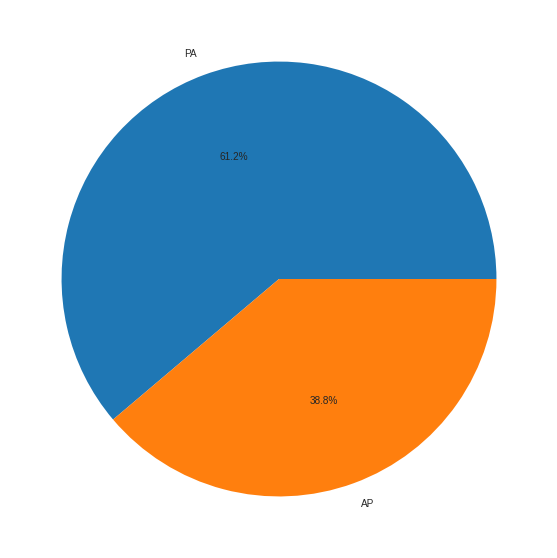

In [ ]:
plt.figure(figsize=(10, 10))
plt.pie([df_patients[df_patients["ViewPosition"] == "PA"].shape[0], df_patients[df_patients["ViewPosition"] == "AP"].shape[0]], labels=["PA", "AP"], autopct='%1.1f%%')
plt.show()

Text(0.5, 1.0, 'Вид изображения относительно ориентации объекта изображения')

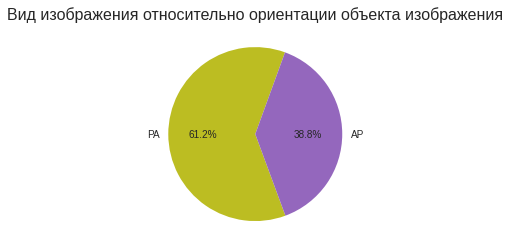

In [ ]:
#Ваш ответ: PA 61, AP 39

#Код для проверки

# import seaborn as sns
basic_palette = sns.color_palette()
plt.style.use('seaborn-whitegrid')
plt.pie([df_patients[df_patients["ViewPosition"] == "PA"].shape[0], df_patients[df_patients["ViewPosition"] == "AP"].shape[0]], labels = ["PA", "AP"], colors=[basic_palette[-2], basic_palette[4]], autopct='%1.1f%%', startangle=70)
plt.title("Вид изображения относительно ориентации объекта изображения", fontsize=16)

### Визуализируйте и ответьте на вопрос: в каком возрастном диапазоне больше всего мужчин.

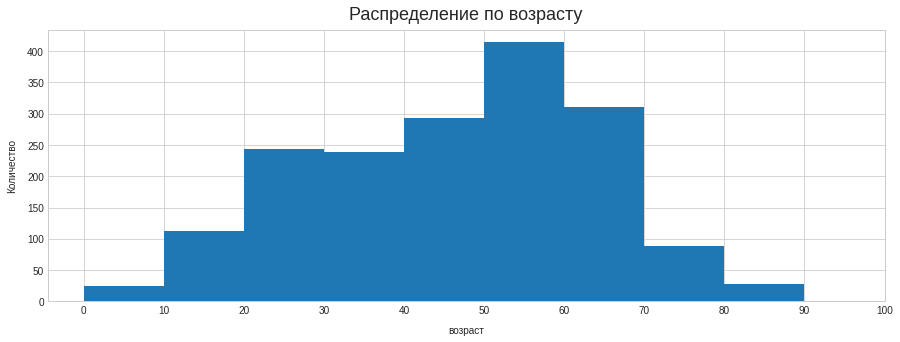

In [ ]:
# Построим гистограмму
# sorted_ages = np.sort(df_patients["Age"].values)

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15, 5))
plt.hist(df_patients[df_patients['Sex']=='M']['Age'], bins=[i for i in range(0, 100, 10)])
plt.title("Распределение по возрасту", fontsize=18, pad=10)
plt.xlabel("возраст", labelpad=10)
plt.xticks([i*10 for i in range(11)])
plt.ylabel("Количество", labelpad=10)
plt.show()

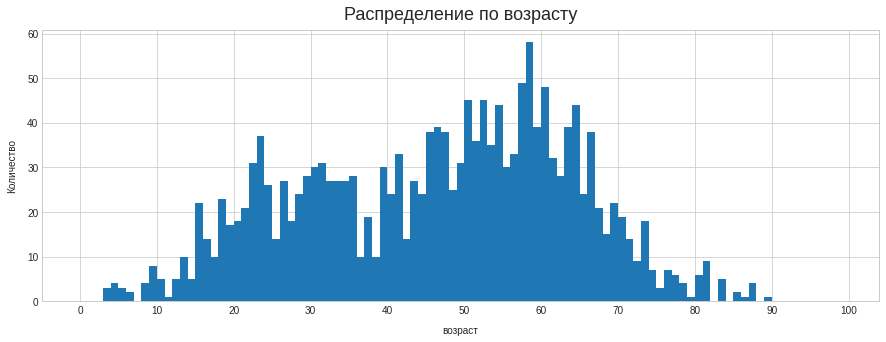

In [ ]:
#Ваш ответ: 50-60

#Код Решения

df_patients["Age"] = pd.to_numeric(df_patients[df_patients['Sex']=='M']["Age"])
sorted_ages = np.sort(df_patients["Age"].values)

import seaborn as sns

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15, 5))
plt.hist(sorted_ages[:-2], bins=[i for i in range(100)])
plt.title("Распределение по возрасту", fontsize=18, pad=10)
plt.xlabel("возраст", labelpad=10)
plt.xticks([i*10 for i in range(11)])
plt.ylabel("Количество", labelpad=10)
plt.show()

## Конвертация изображений

In [ ]:
from skimage.transform import resize
import cv2

example = '/gdrive/MyDrive/MedicalData/Pneumothorax/stage_2_images/ID_01fe90211.dcm'
imagedata= pydicom.dcmread(example)

img =imagedata.pixel_array
name = example.split('/')[-1][:-4]
img = resize(img,(512,512))
cv2.imwrite('{}.png'.format(name), img * 255)

False

Значение Photometric Interpretation определяет предполагаемую интерпретацию данных пикселей изображения.

Нас тут интересуют основные два значения для рентгена:

* MONOCHROME1 - Пиксельные данные представляют собой одну плоскость монохромного изображения. Минимальное значение выборки предназначено для отображения белым цветом после выполнения любых преобразований шкалы серого VOI.
* MONOCHROME2 - Пиксельные данные представляют собой одну плоскость монохромного изображения. Минимальное значение выборки предназначено для отображения черным цветом после выполнения любых преобразований шкалы серого VOI.
Bits Allocated - Количество бит, выделенных для каждой выборки пикселей. Каждой выборке должно быть выделено одинаковое количество битов. Выделенные биты должны быть либо 1, либо кратными 8.

In [ ]:
# проверим метатеги у нашего примера и попробуем конвертировать изображение.
print(imagedata.BitsAllocated)
print(imagedata.PhotometricInterpretation)
#На нашем примере мы увидим 8 и MONOCHROME2. Код переделывать не придётся. Но в случае если PhotometricInterpretation было бы MONOCHROME1 изображение получилось бы инвертированным.

8
MONOCHROME2


### Какая строчка кода конвертирует рентген с PhotometricInterpretation = MONOCHROME1 верным способом

In [ ]:
img = np.invert(imagedata.pixel_array)

In [ ]:
# Ваш ответ: img = np.invert(imagedata.pixel_array)

# В случае если PhotometricInterpretation было бы MONOCHROME1 изображение получилось бы инвертированным. Поэтому используем np.invert, что бы минимальное значение выборки было отображением черного цвета.

8
MONOCHROME2


## Анонимизация данных

In [ ]:
# При работе с изображениями пациентов, часто необходимо анонимизировать файлы. Например, при передачи снимков на разметку врачам.

#1. Самый простой способ это воспользоваться готовой функцией remove_private_tags

example = '/gdrive/MyDrive/MedicalData/Pneumothorax/stage_2_images/ID_01fe90211.dcm'
imagedata= pydicom.dcmread(example)
imagedata.remove_private_tags()
# А затем сохранить новый файл.
output_filename = '/gdrive/MyDrive/MedicalData/Pneumothorax/newdicom1.dcm'
imagedata.save_as(output_filename)

#2.  Можно удалить метатег.
example = '/gdrive/MyDrive/MedicalData/Pneumothorax/stage_2_images/ID_01fe90211.dcm'
imagedata= pydicom.dcmread(example)
if 'PatientSex' in imagedata:
    delattr(imagedata, 'PatientSex')
# А затем сохранить новый файл.
output_filename = '/gdrive/MyDrive/MedicalData/Pneumothorax/newdicom2.dcm'
imagedata.save_as(output_filename)

# 3. Можно изменить значение метатега.
example = '/gdrive/MyDrive/MedicalData/Pneumothorax/stage_2_images/ID_01fe90211.dcm'
imagedata= pydicom.dcmread(example)
tag = 'PatientAge'
if tag in imagedata:
    imagedata.data_element(tag).value = '1111'
# А затем сохранить новый файл.
output_filename = '/gdrive/MyDrive/MedicalData/Pneumothorax/newdicom3.dcm'
imagedata.save_as(output_filename)

In [ ]:
# Извлечем ID пациента, возраст, пол, модальность, часть тела и рентгенологический вид изображения относительно ориентации объекта.
example = '/gdrive/MyDrive/MedicalData/Pneumothorax/newdicom1.dcm'
imagedata= pydicom.dcmread(example)

print("ID:", imagedata.PatientID)
print("Возраст:", imagedata.PatientAge)
print("Пол:", imagedata.PatientSex)
print("Модальность:", imagedata.Modality)
print("Часть тела:", imagedata.BodyPartExamined)
print("Рентгенологический вид изображения относительно ориентации объекта:", imagedata.ViewPosition)

ID: 
Возраст: 26
Пол: F
Модальность: CR
Часть тела: CHEST
Рентгенологический вид изображения относительно ориентации объекта: PA


In [ ]:
# Извлечем ID пациента, возраст, пол, модальность, часть тела и рентгенологический вид изображения относительно ориентации объекта.
example = '/gdrive/MyDrive/MedicalData/Pneumothorax/newdicom2.dcm'
imagedata= pydicom.dcmread(example)

print("ID:", imagedata.PatientID)
print("Возраст:", imagedata.PatientAge)
print("Пол:", imagedata.PatientSex)
print("Модальность:", imagedata.Modality)
print("Часть тела:", imagedata.BodyPartExamined)
print("Рентгенологический вид изображения относительно ориентации объекта:", imagedata.ViewPosition)

ID: 
Возраст: 26


AttributeError: ignored

In [ ]:
# Извлечем ID пациента, возраст, пол, модальность, часть тела и рентгенологический вид изображения относительно ориентации объекта.
example = '/gdrive/MyDrive/MedicalData/Pneumothorax/newdicom3.dcm'
imagedata= pydicom.dcmread(example)

print("ID:", imagedata.PatientID)
print("Возраст:", imagedata.PatientAge)
print("Пол:", imagedata.PatientSex)
print("Модальность:", imagedata.Modality)
print("Часть тела:", imagedata.BodyPartExamined)
print("Рентгенологический вид изображения относительно ориентации объекта:", imagedata.ViewPosition)

ID: 
Возраст: 1111
Пол: F
Модальность: CR
Часть тела: CHEST
Рентгенологический вид изображения относительно ориентации объекта: PA


## Windowing / Что такое Windowing?

# NIfTI-1 Data Format

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving kaggle.json to kaggle.json


OSError: ignored

In [ ]:
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle competitions download -c siim-acr-pneumothorax-segmentation

# подключить гугл диск с набором данных

  0% 0.00/110k [00:00<?, ?B/s]
100% 110k/110k [00:00<00:00, 34.6MB/s]
  0% 0.00/131k [00:00<?, ?B/s]
100% 131k/131k [00:00<00:00, 34.8MB/s]
  0% 0.00/125k [00:00<?, ?B/s]
100% 125k/125k [00:00<00:00, 39.5MB/s]
  0% 0.00/148k [00:00<?, ?B/s]
100% 148k/148k [00:00<00:00, 47.6MB/s]
  0% 0.00/97.3k [00:00<?, ?B/s]
100% 97.3k/97.3k [00:00<00:00, 101MB/s]
  0% 0.00/113k [00:00<?, ?B/s]
100% 113k/113k [00:00<00:00, 86.0MB/s]
  0% 0.00/153k [00:00<?, ?B/s]
100% 153k/153k [00:00<00:00, 49.7MB/s]
  0% 0.00/130k [00:00<?, ?B/s]
100% 130k/130k [00:00<00:00, 29.4MB/s]
  0% 0.00/150k [00:00<?, ?B/s]
100% 150k/150k [00:00<00:00, 47.6MB/s]
  0% 0.00/155k [00:00<?, ?B/s]
100% 155k/155k [00:00<00:00, 105MB/s]
  0% 0.00/111k [00:00<?, ?B/s]
100% 111k/111k [00:00<00:00, 158MB/s]
  0% 0.00/153k [00:00<?, ?B/s]
100% 153k/153k [00:00<00:00, 48.1MB/s]
  0% 0.00/138k [00:00<?, ?B/s]
100% 138k/138k [00:00<00:00, 135MB/s]
  0% 0.00/114k [00:00<?, ?B/s]
100% 114k/114k [00:00<00:00, 117MB/s]
  0% 0.00/106k [00:00<

In [ ]:
!pip install nibabel

In [ ]:
!kaggle datasets download -d andrewmvd/liver-tumor-segmentation

100% 4.82G/4.84G [01:31<00:00, 82.5MB/s]
100% 4.84G/4.84G [01:32<00:00, 56.4MB/s]


In [ ]:
!unzip liver-tumor-segmentation.zip

Archive:  liver-tumor-segmentation.zip
  inflating: segmentations/segmentation-0.nii  
  inflating: segmentations/segmentation-1.nii  
  inflating: segmentations/segmentation-10.nii  
  inflating: segmentations/segmentation-100.nii  
  inflating: segmentations/segmentation-101.nii  
  inflating: segmentations/segmentation-102.nii  
  inflating: segmentations/segmentation-103.nii  
  inflating: segmentations/segmentation-104.nii  
  inflating: segmentations/segmentation-105.nii  
  inflating: segmentations/segmentation-106.nii  
  inflating: segmentations/segmentation-107.nii  
  inflating: segmentations/segmentation-108.nii  
  inflating: segmentations/segmentation-109.nii  
  inflating: segmentations/segmentation-11.nii  
  inflating: segmentations/segmentation-110.nii  
  inflating: segmentations/segmentation-111.nii  
  inflating: segmentations/segmentation-112.nii  
  inflating: segmentations/segmentation-113.nii  
  inflating: segmentations/segmentation-114.nii  
  inflating: segm

In [ ]:
!pip install lungs-segmentation

     |████████████████████████████████| 81kB 3.7MB/s 
     |████████████████████████████████| 12.8MB 9.5MB/s 
     |████████████████████████████████| 776.8MB 23kB/s 
     |████████████████████████████████| 28.2MB 136kB/s 
     |████████████████████████████████| 20.0MB 1.5MB/s 
     |████████████████████████████████| 798kB 40.0MB/s 
     |████████████████████████████████| 13.1MB 294kB/s 
     |████████████████████████████████| 952kB 39.7MB/s 
     |████████████████████████████████| 37.6MB 98kB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.17.4 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Found existing installation: opencv-python 4.1.2.30
    Un

In [ ]:
!pip install git+https://github.com/JoHof/lungmask

  Cloning https://github.com/JoHof/lungmask to /tmp/pip-req-build-qejyu63h
  Running command git clone -q https://github.com/JoHof/lungmask /tmp/pip-req-build-qejyu63h
     |████████████████████████████████| 47.4MB 86kB/s 
     |████████████████████████████████| 1.2MB 47.4MB/s 
     |████████████████████████████████| 3.6MB 45.6MB/s 
  Created wheel for lungmask: filename=lungmask-0.2.8-cp37-none-any.whl size=17169 sha256=aca1fc23dff3994d08bd89d340dd73d18f65eb90721374860daaf40d3e1a245b
  Stored in directory: /tmp/pip-ephem-wheel-cache-nfad57nj/wheels/59/2e/c0/1365551c1853d11aef03baf7ed94cdac831342c7f8a03e45ca
Successfully built lungmask


In [ ]:
!kaggle datasets download -d kmader/siim-medical-images

 93% 232M/250M [00:01<00:00, 118MB/s] 
100% 250M/250M [00:02<00:00, 129MB/s]


In [ ]:
!unzip siim-medical-images.zip -d siim

Archive:  siim-medical-images.zip
  inflating: siim/dicom_dir/ID_0000_AGE_0060_CONTRAST_1_CT.dcm  
  inflating: siim/dicom_dir/ID_0001_AGE_0069_CONTRAST_1_CT.dcm  
  inflating: siim/dicom_dir/ID_0002_AGE_0074_CONTRAST_1_CT.dcm  
  inflating: siim/dicom_dir/ID_0003_AGE_0075_CONTRAST_1_CT.dcm  
  inflating: siim/dicom_dir/ID_0004_AGE_0056_CONTRAST_1_CT.dcm  
  inflating: siim/dicom_dir/ID_0005_AGE_0048_CONTRAST_1_CT.dcm  
  inflating: siim/dicom_dir/ID_0006_AGE_0075_CONTRAST_1_CT.dcm  
  inflating: siim/dicom_dir/ID_0007_AGE_0061_CONTRAST_1_CT.dcm  
  inflating: siim/dicom_dir/ID_0008_AGE_0051_CONTRAST_1_CT.dcm  
  inflating: siim/dicom_dir/ID_0009_AGE_0048_CONTRAST_1_CT.dcm  
  inflating: siim/dicom_dir/ID_0010_AGE_0060_CONTRAST_1_CT.dcm  
  inflating: siim/dicom_dir/ID_0011_AGE_0061_CONTRAST_1_CT.dcm  
  inflating: siim/dicom_dir/ID_0012_AGE_0061_CONTRAST_1_CT.dcm  
  inflating: siim/dicom_dir/ID_0013_AGE_0060_CONTRAST_1_CT.dcm  
  inflating: siim/dicom_dir/ID_0014_AGE_0071_CONTRAST_1_

In [ ]:
!mkdir siim/png

In [ ]:
!cp siim/dicom_dir/ID_0099_AGE_0061_CONTRAST_0_CT.dcm siim/png

In [ ]:
! [ -e /content ] && pip install -Uqq fastai

     |████████████████████████████████| 194kB 4.3MB/s 
     |████████████████████████████████| 61kB 5.2MB/s 


In [ ]:
!pip install kornia

     |████████████████████████████████| 276kB 4.3MB/s 


In [ ]:
!ls

download_images.py  ID_00f715288.dcm		  mask_functions.py
ID_0011fe81e.dcm    ID_010566ba9.dcm		  sample_data
ID_003206608.dcm    ID_0159b1d59.dcm		  segmentations
ID_004d6fbb6.dcm    ID_017bd788a.dcm		  stage_2_sample_submission.csv
ID_004d72c54.dcm    ID_018f96b48.dcm		  stage_2_train.csv.zip
ID_00528aa0e.dcm    ID_0194bdd5a.dcm		  volume_pt1
ID_00593ac6d.dcm    ID_01a3312da.dcm		  volume_pt2
ID_00b0e5a9f.dcm    ID_01bbf9032.dcm		  volume_pt3
ID_00b115bfe.dcm    ID_01c754b4a.dcm		  volume_pt4
ID_00d054471.dcm    ID_01fe90211.dcm		  volume_pt5
ID_00f04769e.dcm    liver-tumor-segmentation.zip


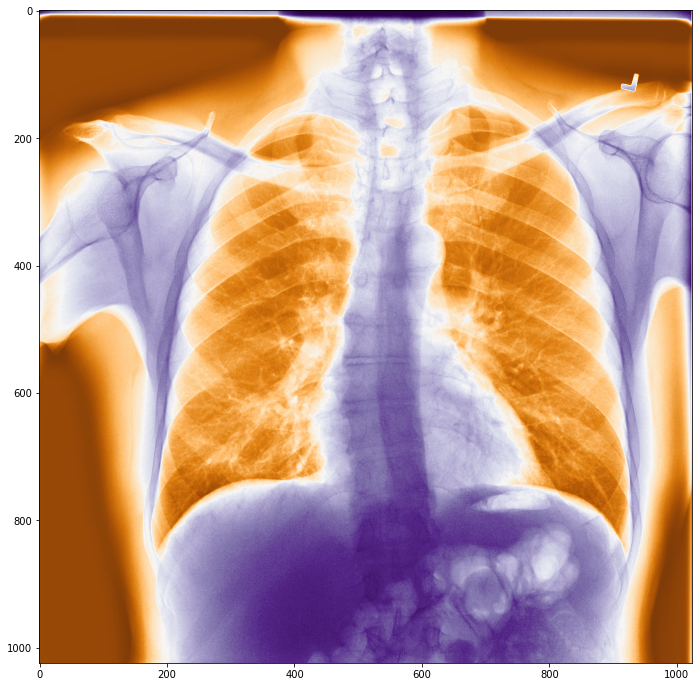

In [ ]:
example = '/gdrive/MyDrive/MedicalData/Pneumothorax/stage_2_images/ID_00593ac6d.dcm'
imagedata= pydicom.dcmread(example)

plt.figure(figsize=(12, 12))
plt.imshow(imagedata.pixel_array, cmap=plt.cm.PuOr)
plt.show()